In [15]:
from tensorflow.keras.layers import *
from tensorflow.keras.activations import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.metrics import *
from tensorflow.keras.initializers import *
from tensorflow.keras.utils import *
from tensorflow.keras.models import *
from tensorflow.keras.datasets import *
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import datetime
import os
import pandas as pd
from PIL import Image
from matplotlib import image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint,ReduceLROnPlateau

Machine Amrta

In [16]:
filename = "C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\Projet_Annuel_Data\\Data_Train_Foot.csv"
filename_test= 'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\Projet_Annuel_Data\\Data_Test_Foot.csv'

Machine Dylane

In [17]:
filename = 'Scripts_Recup_Data/Projet_Annuel_Data/Data_Train_Foot.csv'
filename_test= 'Scripts_Recup_Data/Projet_Annuel_Data/Data_Test_Foot.csv'

In [18]:
# Chargement des données csv
data= pd.read_csv(filename,sep=";",index_col=0)
data.head()

,date,homeTeam,awayTeam,score,mi_temps_gagnante,goalHomeTeam_FullTime,goalAwayTeam_FullTime,goalHomeTeam_HalfTime,goalAwayTeam_HalfTime,NbgoalsHalfTime,...,moy_goals_home,moy_goals_away,moy_goals_half_home,moy_goals_half_away,moy_goals_conceded_home,moy_goals_conceded_away,moy_goals_conceded_half_home,moy_goals_conceded_half_away,puissance_HomeTeam,puissance_AwayTeam
0,2019-08-09 00:00:00,AS Monaco FC,Olympique Lyonnais,2.0,1,0.0,3.0,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2409,6154
1,2019-08-10 00:00:00,Olympique de Marseille,Stade de Reims,2.0,2,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4008,3054
2,2019-08-10 00:00:00,Montpellier HSC,Stade Rennais FC 1901,2.0,1,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3029,4815
3,2019-08-10 00:00:00,OGC Nice,Amiens SC,1.0,2,2.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2803,2045
4,2019-08-10 00:00:00,Stade Brestois 29,Toulouse FC,0.0,1,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2156,1065


# Construction du Y 

In [138]:
def nb_buts(x,data):
    tab =data.values
    for i in tab:
        if i[10]>x:
            i[24] = 1
        else:
             i[24] = 0
    a = tab[:,24]
    return a.astype(int)

## MODELE 1 :Y pour buts >0,5

In [139]:
a=nb_buts(0.5,data)
data_x = data.copy()
data_x['buts_class'] = a.astype("int64")
data_x

,date,homeTeam,awayTeam,score,mi_temps_gagnante,goalHomeTeam_FullTime,goalAwayTeam_FullTime,goalHomeTeam_HalfTime,goalAwayTeam_HalfTime,NbgoalsHalfTime,...,moy_goals_away,moy_goals_half_home,moy_goals_half_away,moy_goals_conceded_home,moy_goals_conceded_away,moy_goals_conceded_half_home,moy_goals_conceded_half_away,puissance_HomeTeam,puissance_AwayTeam,buts_class
0,2019-08-09 00:00:00,AS Monaco FC,Olympique Lyonnais,2.0,1,0.0,3.0,0.0,2.0,2.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2409,6154,1
1,2019-08-10 00:00:00,Olympique de Marseille,Stade de Reims,2.0,2,0.0,2.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4008,3054,1
2,2019-08-10 00:00:00,Montpellier HSC,Stade Rennais FC 1901,2.0,1,0.0,1.0,0.0,1.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3029,4815,1
3,2019-08-10 00:00:00,OGC Nice,Amiens SC,1.0,2,2.0,1.0,1.0,0.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2803,2045,1
4,2019-08-10 00:00:00,Stade Brestois 29,Toulouse FC,0.0,1,1.0,1.0,1.0,0.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2156,1065,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2019-05-18,Levante,Ath Madrid,0.0,0,2.0,2.0,2.0,0.0,2.0,...,1.678414,0.437086,0.678414,1.140969,0.660793,0.471366,0.229075,5198,10169,1
376,2019-05-18,Sevilla,Ath Bilbao,1.0,0,2.0,0.0,1.0,0.0,1.0,...,1.268722,0.651982,0.590308,1.312775,1.162996,0.603524,0.519824,9335,6881,1
377,2019-05-18,Valladolid,Valencia,2.0,0,0.0,2.0,0.0,1.0,1.0,...,1.506608,0.297297,0.722467,0.215859,1.246696,0.088106,0.533040,4109,12990,1
378,2019-05-19,Eibar,Barcelona,0.0,1,2.0,2.0,2.0,2.0,4.0,...,2.823789,0.572687,1.074890,1.392070,0.823789,0.629956,0.361233,4455,15917,1


In [140]:
x=data_x[['puissance_HomeTeam','puissance_AwayTeam','moy_goals_home','moy_goals_away','moy_goals_conceded_home',
        'moy_goals_conceded_away']]

data_test= pd.read_csv(filename_test,sep=";",index_col=0)
x_prediction=data_test[['date','status','id_match','homeTeam','awayTeam','idHomeTeam','idAwayTeam',
                        'puissance_HomeTeam','puissance_AwayTeam','moy_goals_home','moy_goals_away',
                        'moy_goals_conceded_home','moy_goals_conceded_away']]
x_prediction


,date,status,id_match,homeTeam,awayTeam,idHomeTeam,idAwayTeam,puissance_HomeTeam,puissance_AwayTeam,moy_goals_home,moy_goals_away,moy_goals_conceded_home,moy_goals_conceded_away
1429,2020-07-02,FINISHED,279509,AS Roma,Udinese Calcio,100,115,6735,3100,1.892857,0.821429,1.357143,1.464286
1984,2020-07-03,FINISHED,274443,CD Santa Clara,CS Marítimo,5530,5575,3175,1672,1.000000,1.000000,1.206897,1.310345
1090,2020-07-03,FINISHED,273894,Club Atlético de Madrid,RCD Mallorca,78,89,9329,2475,1.341463,1.060606,0.969697,1.696970
1432,2020-07-04,FINISHED,279520,SS Lazio,AC Milan,110,98,6846,4490,2.275862,1.241379,0.965517,1.275862
1431,2020-07-04,FINISHED,279526,US Sassuolo Calcio,US Lecce,471,5890,3086,1781,1.758621,1.241379,1.724138,2.275862
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,2020-07-26,SCHEDULED,274477,Sport Lisboa e Benfica,Sporting Clube de Portugal,1903,498,6562,5314,1.972973,1.548387,1.161290,0.967742
2025,2020-07-26,SCHEDULED,274478,Vitória FC,Os Belenenses Futebol,5620,5568,3593,1589,0.774194,0.833333,1.366667,1.666667
2026,2020-07-26,SCHEDULED,274479,CD Santa Clara,Vitória SC,5530,5543,3175,3593,0.935484,1.612903,1.193548,1.096774
2027,2020-07-26,SCHEDULED,274480,Portimonense SC,CD Aves,5601,5544,1067,1159,0.806452,0.774194,1.354839,1.903226


In [141]:
y = data_x.buts_class
np.unique(y)

array([0, 1], dtype=int64)

In [142]:
x=np.array(x)
y=np.array(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

y_train = y_train.astype(np.int)
classes=np.unique(y_train)
nbClasses=len(classes)
print(x_train.shape,y_train.shape)
print(nbClasses)
y_train

(9238, 6) (9238,)
2


array([1, 0, 1, ..., 1, 1, 1])

In [143]:
def create_model():
    
    model = Sequential()
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(nbClasses, activation='softmax'))    
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=Adam(),
                  metrics=["accuracy"])
    return model

In [144]:
model_zero_cinq = create_model()
print(model_zero_cinq.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_160 (Dense)            (None, 512)               3584      
_________________________________________________________________
dense_161 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_162 (Dense)            (None, 512)               66048     
_________________________________________________________________
dense_163 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_164 (Dense)            (None, 512)               66048     
_________________________________________________________________
dense_165 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_166 (Dense)            (None, 128)             

In [145]:
save_zero_cinq = ModelCheckpoint('model_buts_0,5.h5', monitor = 'val_accuracy' , verbose = 1 , save_best_only = True)

In [146]:
history = model_zero_cinq.fit(x_train, y_train,validation_data=(x_test,y_test),batch_size=90,epochs=50,
                    callbacks = [save_zero_cinq])

Train on 9238 samples, validate on 2310 samples
Epoch 1/50
8910/9238 [===========================>..] - ETA: 0s - loss: 5.7089 - accuracy: 0.8630
Epoch 00001: val_accuracy improved from -inf to 0.90779, saving model to model_buts_0,5.h5
9238/9238 [==============================] - 2s 225us/sample - loss: 5.5394 - accuracy: 0.8645 - val_loss: 0.4130 - val_accuracy: 0.9078
Epoch 2/50
8730/9238 [===========================>..] - ETA: 0s - loss: 0.3672 - accuracy: 0.9183
Epoch 00002: val_accuracy improved from 0.90779 to 0.92987, saving model to model_buts_0,5.h5
9238/9238 [==============================] - 1s 131us/sample - loss: 0.3606 - accuracy: 0.9196 - val_loss: 0.2656 - val_accuracy: 0.9299
Epoch 3/50
9090/9238 [============================>.] - ETA: 0s - loss: 0.2808 - accuracy: 0.9243
Epoch 00003: val_accuracy did not improve from 0.92987
9238/9238 [==============================] - 1s 129us/sample - loss: 0.2815 - accuracy: 0.9240 - val_loss: 0.2584 - val_accuracy: 0.9299
Epoch 4

Epoch 29/50
8910/9238 [===========================>..] - ETA: 0s - loss: 0.2689 - accuracy: 0.9241
Epoch 00029: val_accuracy did not improve from 0.92987
9238/9238 [==============================] - 1s 125us/sample - loss: 0.2692 - accuracy: 0.9240 - val_loss: 0.2559 - val_accuracy: 0.9299
Epoch 30/50
9090/9238 [============================>.] - ETA: 0s - loss: 0.2687 - accuracy: 0.9240
Epoch 00030: val_accuracy did not improve from 0.92987
9238/9238 [==============================] - 1s 121us/sample - loss: 0.2687 - accuracy: 0.9240 - val_loss: 0.2520 - val_accuracy: 0.9299
Epoch 31/50
9180/9238 [============================>.] - ETA: 0s - loss: 0.2681 - accuracy: 0.9242
Epoch 00031: val_accuracy did not improve from 0.92987
9238/9238 [==============================] - 1s 129us/sample - loss: 0.2685 - accuracy: 0.9240 - val_loss: 0.2547 - val_accuracy: 0.9299
Epoch 32/50
8820/9238 [===========================>..] - ETA: 0s - loss: 0.2692 - accuracy: 0.9238
Epoch 00032: val_accuracy di

Text(0, 0.5, 'Accuracy')

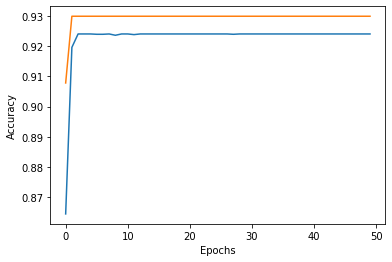

In [147]:
plt.plot(history.history['accuracy'],label='Accuracy')#bleu
plt.plot(history.history['val_accuracy'],label='validation_Accuracy')#orange
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Prediction y > 0.5

In [148]:
unique = x_prediction.values
results = []
superieurzero =[]
inferieurzero = []
i = 0
predictions_final = model_zero_cinq.predict(np.array([x_train[1]]))
predictions_final

array([[0.07935381, 0.92064625]], dtype=float32)

In [47]:
model_zero_cinq.load_weights("model_buts_0,5.h5")

In [149]:
for i in unique:
    predictions_final = model_zero_cinq.predict(np.array([[i[7],i[8],i[9],i[10],i[11],i[12]]])) 
    result = np.argmax(predictions_final)
    results.append(result)
    pred0 =round(predictions_final[0][0],2)
    superieurzero.append(pred0)
    pred1 =round(predictions_final[0][1],2)
    inferieurzero.append(pred1)


In [150]:
df = {'date':x_prediction.date,'id_match':x_prediction.id_match,'status':x_prediction.status,'id_HomeTeam':x_prediction.idHomeTeam,'id_AwayTeam':x_prediction.idAwayTeam,
      'homeTeam':x_prediction.homeTeam,'AwayTeam':x_prediction.awayTeam,'probabilité < 0,5 buts':inferieurzero,'probabilité > 0,5 buts':superieurzero}
df = pd.DataFrame(df)
df

,date,id_match,status,id_HomeTeam,id_AwayTeam,homeTeam,AwayTeam,"probabilité < 0,5 buts","probabilité > 0,5 buts"
1429,2020-07-02,279509,FINISHED,100,115,AS Roma,Udinese Calcio,0.94,0.06
1984,2020-07-03,274443,FINISHED,5530,5575,CD Santa Clara,CS Marítimo,0.92,0.08
1090,2020-07-03,273894,FINISHED,78,89,Club Atlético de Madrid,RCD Mallorca,0.95,0.05
1432,2020-07-04,279520,FINISHED,110,98,SS Lazio,AC Milan,0.92,0.08
1431,2020-07-04,279526,FINISHED,471,5890,US Sassuolo Calcio,US Lecce,0.92,0.08
...,...,...,...,...,...,...,...,...,...
2024,2020-07-26,274477,SCHEDULED,1903,498,Sport Lisboa e Benfica,Sporting Clube de Portugal,0.92,0.08
2025,2020-07-26,274478,SCHEDULED,5620,5568,Vitória FC,Os Belenenses Futebol,0.93,0.07
2026,2020-07-26,274479,SCHEDULED,5530,5543,CD Santa Clara,Vitória SC,0.93,0.07
2027,2020-07-26,274480,SCHEDULED,5601,5544,Portimonense SC,CD Aves,0.92,0.08


In [151]:
df.to_csv('C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_buts_matchs\\predictions_buts_matchs_modele_0,5.csv',index = False)
df.to_json (r'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_buts_matchs\\predictions_buts_matchs_modele_0,5.json')

## MODELE 2 :Y pour buts > 1,5

In [152]:
a=nb_buts(1.5,data)
data_x = data.copy()
data_x['buts_class'] = a.astype("int64")
data_x

,date,homeTeam,awayTeam,score,mi_temps_gagnante,goalHomeTeam_FullTime,goalAwayTeam_FullTime,goalHomeTeam_HalfTime,goalAwayTeam_HalfTime,NbgoalsHalfTime,...,moy_goals_away,moy_goals_half_home,moy_goals_half_away,moy_goals_conceded_home,moy_goals_conceded_away,moy_goals_conceded_half_home,moy_goals_conceded_half_away,puissance_HomeTeam,puissance_AwayTeam,buts_class
0,2019-08-09 00:00:00,AS Monaco FC,Olympique Lyonnais,2.0,1,0.0,3.0,0.0,2.0,2.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2409,6154,1
1,2019-08-10 00:00:00,Olympique de Marseille,Stade de Reims,2.0,2,0.0,2.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4008,3054,1
2,2019-08-10 00:00:00,Montpellier HSC,Stade Rennais FC 1901,2.0,1,0.0,1.0,0.0,1.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3029,4815,0
3,2019-08-10 00:00:00,OGC Nice,Amiens SC,1.0,2,2.0,1.0,1.0,0.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2803,2045,1
4,2019-08-10 00:00:00,Stade Brestois 29,Toulouse FC,0.0,1,1.0,1.0,1.0,0.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2156,1065,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2019-05-18,Levante,Ath Madrid,0.0,0,2.0,2.0,2.0,0.0,2.0,...,1.678414,0.437086,0.678414,1.140969,0.660793,0.471366,0.229075,5198,10169,1
376,2019-05-18,Sevilla,Ath Bilbao,1.0,0,2.0,0.0,1.0,0.0,1.0,...,1.268722,0.651982,0.590308,1.312775,1.162996,0.603524,0.519824,9335,6881,1
377,2019-05-18,Valladolid,Valencia,2.0,0,0.0,2.0,0.0,1.0,1.0,...,1.506608,0.297297,0.722467,0.215859,1.246696,0.088106,0.533040,4109,12990,1
378,2019-05-19,Eibar,Barcelona,0.0,1,2.0,2.0,2.0,2.0,4.0,...,2.823789,0.572687,1.074890,1.392070,0.823789,0.629956,0.361233,4455,15917,1


In [153]:
y = data_x.buts_class
np.unique(y)

array([0, 1], dtype=int64)

In [154]:
x=data_x[['puissance_HomeTeam','puissance_AwayTeam','moy_goals_home','moy_goals_away','moy_goals_conceded_home',
        'moy_goals_conceded_away']]

data_test= pd.read_csv(filename_test,sep=";",index_col=0)
x_prediction=data_test[['date','status','id_match','homeTeam','awayTeam','idHomeTeam','idAwayTeam',
                        'puissance_HomeTeam','puissance_AwayTeam','moy_goals_home','moy_goals_away',
                        'moy_goals_conceded_home','moy_goals_conceded_away']]
x_prediction


,date,status,id_match,homeTeam,awayTeam,idHomeTeam,idAwayTeam,puissance_HomeTeam,puissance_AwayTeam,moy_goals_home,moy_goals_away,moy_goals_conceded_home,moy_goals_conceded_away
1429,2020-07-02,FINISHED,279509,AS Roma,Udinese Calcio,100,115,6735,3100,1.892857,0.821429,1.357143,1.464286
1984,2020-07-03,FINISHED,274443,CD Santa Clara,CS Marítimo,5530,5575,3175,1672,1.000000,1.000000,1.206897,1.310345
1090,2020-07-03,FINISHED,273894,Club Atlético de Madrid,RCD Mallorca,78,89,9329,2475,1.341463,1.060606,0.969697,1.696970
1432,2020-07-04,FINISHED,279520,SS Lazio,AC Milan,110,98,6846,4490,2.275862,1.241379,0.965517,1.275862
1431,2020-07-04,FINISHED,279526,US Sassuolo Calcio,US Lecce,471,5890,3086,1781,1.758621,1.241379,1.724138,2.275862
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,2020-07-26,SCHEDULED,274477,Sport Lisboa e Benfica,Sporting Clube de Portugal,1903,498,6562,5314,1.972973,1.548387,1.161290,0.967742
2025,2020-07-26,SCHEDULED,274478,Vitória FC,Os Belenenses Futebol,5620,5568,3593,1589,0.774194,0.833333,1.366667,1.666667
2026,2020-07-26,SCHEDULED,274479,CD Santa Clara,Vitória SC,5530,5543,3175,3593,0.935484,1.612903,1.193548,1.096774
2027,2020-07-26,SCHEDULED,274480,Portimonense SC,CD Aves,5601,5544,1067,1159,0.806452,0.774194,1.354839,1.903226


In [155]:
x=np.array(x)
y=np.array(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

y_train = y_train.astype(np.int)
classes=np.unique(y_train)
nbClasses=len(classes)
print(x_train.shape,y_train.shape)
print(nbClasses)
y_train

(9238, 6) (9238,)
2


array([1, 1, 1, ..., 0, 0, 0])

In [156]:
def create_model():
    
    model = Sequential()
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(nbClasses, activation='softmax'))    
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=Adam(),
                  metrics=["accuracy"])
    return model

In [157]:
model_un_cinq = create_model()
print(model_un_cinq.summary())

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_176 (Dense)            (None, 512)               3584      
_________________________________________________________________
dense_177 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_178 (Dense)            (None, 512)               66048     
_________________________________________________________________
dense_179 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_180 (Dense)            (None, 512)               66048     
_________________________________________________________________
dense_181 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_182 (Dense)            (None, 128)             

In [158]:
save_un_cinq = ModelCheckpoint('model_buts_1,5.h5', monitor = 'val_accuracy' , verbose = 1 , save_best_only = True)

In [159]:
history = model_un_cinq.fit(x_train, y_train,validation_data=(x_test,y_test),batch_size=90,epochs=50,
                    callbacks = [save_un_cinq])

Train on 9238 samples, validate on 2310 samples
Epoch 1/50
8910/9238 [===========================>..] - ETA: 0s - loss: 6.8004 - accuracy: 0.6460
Epoch 00001: val_accuracy improved from -inf to 0.75022, saving model to model_buts_1,5.h5
9238/9238 [==============================] - 3s 332us/sample - loss: 6.5820 - accuracy: 0.6487 - val_loss: 0.6354 - val_accuracy: 0.7502
Epoch 2/50
8820/9238 [===========================>..] - ETA: 0s - loss: 0.6287 - accuracy: 0.7209
Epoch 00002: val_accuracy did not improve from 0.75022
9238/9238 [==============================] - 1s 133us/sample - loss: 0.6264 - accuracy: 0.7227 - val_loss: 0.5658 - val_accuracy: 0.7502
Epoch 3/50
9180/9238 [============================>.] - ETA: 0s - loss: 0.5882 - accuracy: 0.7343
Epoch 00003: val_accuracy did not improve from 0.75022
9238/9238 [==============================] - 1s 128us/sample - loss: 0.5881 - accuracy: 0.7341 - val_loss: 0.6099 - val_accuracy: 0.7502
Epoch 4/50
9000/9238 [========================

Epoch 29/50
9000/9238 [============================>.] - ETA: 0s - loss: 0.5694 - accuracy: 0.7411
Epoch 00029: val_accuracy did not improve from 0.75022
9238/9238 [==============================] - 1s 123us/sample - loss: 0.5696 - accuracy: 0.7409 - val_loss: 0.5572 - val_accuracy: 0.7502
Epoch 30/50
8820/9238 [===========================>..] - ETA: 0s - loss: 0.5688 - accuracy: 0.7404
Epoch 00030: val_accuracy did not improve from 0.75022
9238/9238 [==============================] - 1s 128us/sample - loss: 0.5680 - accuracy: 0.7409 - val_loss: 0.5565 - val_accuracy: 0.7502
Epoch 31/50
9180/9238 [============================>.] - ETA: 0s - loss: 0.5700 - accuracy: 0.7401
Epoch 00031: val_accuracy did not improve from 0.75022
9238/9238 [==============================] - 1s 127us/sample - loss: 0.5692 - accuracy: 0.7407 - val_loss: 0.5600 - val_accuracy: 0.7502
Epoch 32/50
9090/9238 [============================>.] - ETA: 0s - loss: 0.5711 - accuracy: 0.7398
Epoch 00032: val_accuracy di

Text(0, 0.5, 'Accuracy')

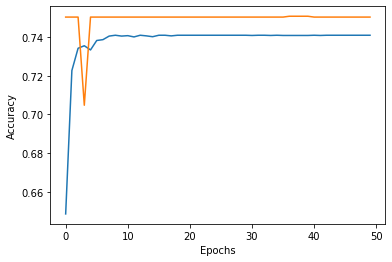

In [160]:
plt.plot(history.history['accuracy'],label='Accuracy')#bleu
plt.plot(history.history['val_accuracy'],label='validation_Accuracy')#orange
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Prediction y > 1.5

In [170]:
unique = x_prediction.values
results = []
superieurun =[]
inferieurun = []
i = 0
predictions_final = model_un_cinq.predict(np.array([x_train[1]]))
predictions_final

array([[0.2539877 , 0.74601233]], dtype=float32)

In [171]:
model_un_cinq.load_weights("model_buts_1,5.h5")

In [172]:
for i in unique:
    predictions_final = model_un_cinq.predict(np.array([[i[7],i[8],i[9],i[10],i[11],i[12]]])) 
    result = np.argmax(predictions_final)
    results.append(result)
    pred0 =round(predictions_final[0][0],2)
    superieurun.append(pred0)
    pred1 =round(predictions_final[0][1],2)
    inferieurun.append(pred1)

In [173]:
df = {'date':x_prediction.date,'id_match':x_prediction.id_match,'status':x_prediction.status,'id_HomeTeam':x_prediction.idHomeTeam,'id_AwayTeam':x_prediction.idAwayTeam,
      'homeTeam':x_prediction.homeTeam,'AwayTeam':x_prediction.awayTeam,'probabilité < 1,5 buts':inferieurun,'probabilité > 1,5 buts':superieurun}
df = pd.DataFrame(df)
df

,date,id_match,status,id_HomeTeam,id_AwayTeam,homeTeam,AwayTeam,"probabilité < 1,5 buts","probabilité > 1,5 buts"
1429,2020-07-02,279509,FINISHED,100,115,AS Roma,Udinese Calcio,0.73,0.27
1984,2020-07-03,274443,FINISHED,5530,5575,CD Santa Clara,CS Marítimo,0.70,0.30
1090,2020-07-03,273894,FINISHED,78,89,Club Atlético de Madrid,RCD Mallorca,0.77,0.23
1432,2020-07-04,279520,FINISHED,110,98,SS Lazio,AC Milan,0.74,0.26
1431,2020-07-04,279526,FINISHED,471,5890,US Sassuolo Calcio,US Lecce,0.70,0.30
...,...,...,...,...,...,...,...,...,...
2024,2020-07-26,274477,SCHEDULED,1903,498,Sport Lisboa e Benfica,Sporting Clube de Portugal,0.75,0.25
2025,2020-07-26,274478,SCHEDULED,5620,5568,Vitória FC,Os Belenenses Futebol,0.70,0.30
2026,2020-07-26,274479,SCHEDULED,5530,5543,CD Santa Clara,Vitória SC,0.71,0.29
2027,2020-07-26,274480,SCHEDULED,5601,5544,Portimonense SC,CD Aves,0.69,0.31


In [174]:
df.to_csv('C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_buts_matchs\\predictions_buts_matchs_modele_1,5.csv',index = False)
df.to_json (r'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_buts_matchs\\predictions_buts_matchs_modele_1,5.json')

## MODELE 3 :Y pour buts > 2,5

In [175]:
a=nb_buts(2.5,data)
data_x = data.copy()
data_x['buts_class'] = a.astype("int64")
data_x

,date,homeTeam,awayTeam,score,mi_temps_gagnante,goalHomeTeam_FullTime,goalAwayTeam_FullTime,goalHomeTeam_HalfTime,goalAwayTeam_HalfTime,NbgoalsHalfTime,...,moy_goals_away,moy_goals_half_home,moy_goals_half_away,moy_goals_conceded_home,moy_goals_conceded_away,moy_goals_conceded_half_home,moy_goals_conceded_half_away,puissance_HomeTeam,puissance_AwayTeam,buts_class
0,2019-08-09 00:00:00,AS Monaco FC,Olympique Lyonnais,2.0,1,0.0,3.0,0.0,2.0,2.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2409,6154,1
1,2019-08-10 00:00:00,Olympique de Marseille,Stade de Reims,2.0,2,0.0,2.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4008,3054,0
2,2019-08-10 00:00:00,Montpellier HSC,Stade Rennais FC 1901,2.0,1,0.0,1.0,0.0,1.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3029,4815,0
3,2019-08-10 00:00:00,OGC Nice,Amiens SC,1.0,2,2.0,1.0,1.0,0.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2803,2045,1
4,2019-08-10 00:00:00,Stade Brestois 29,Toulouse FC,0.0,1,1.0,1.0,1.0,0.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2156,1065,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2019-05-18,Levante,Ath Madrid,0.0,0,2.0,2.0,2.0,0.0,2.0,...,1.678414,0.437086,0.678414,1.140969,0.660793,0.471366,0.229075,5198,10169,1
376,2019-05-18,Sevilla,Ath Bilbao,1.0,0,2.0,0.0,1.0,0.0,1.0,...,1.268722,0.651982,0.590308,1.312775,1.162996,0.603524,0.519824,9335,6881,0
377,2019-05-18,Valladolid,Valencia,2.0,0,0.0,2.0,0.0,1.0,1.0,...,1.506608,0.297297,0.722467,0.215859,1.246696,0.088106,0.533040,4109,12990,0
378,2019-05-19,Eibar,Barcelona,0.0,1,2.0,2.0,2.0,2.0,4.0,...,2.823789,0.572687,1.074890,1.392070,0.823789,0.629956,0.361233,4455,15917,1


In [176]:
x=data_x[['puissance_HomeTeam','puissance_AwayTeam','moy_goals_home','moy_goals_away','moy_goals_conceded_home',
        'moy_goals_conceded_away']]

data_test= pd.read_csv(filename_test,sep=";",index_col=0)
x_prediction=data_test[['date','status','id_match','homeTeam','awayTeam','idHomeTeam','idAwayTeam',
                        'puissance_HomeTeam','puissance_AwayTeam','moy_goals_home','moy_goals_away',
                        'moy_goals_conceded_home','moy_goals_conceded_away']]
x_prediction


,date,status,id_match,homeTeam,awayTeam,idHomeTeam,idAwayTeam,puissance_HomeTeam,puissance_AwayTeam,moy_goals_home,moy_goals_away,moy_goals_conceded_home,moy_goals_conceded_away
1429,2020-07-02,FINISHED,279509,AS Roma,Udinese Calcio,100,115,6735,3100,1.892857,0.821429,1.357143,1.464286
1984,2020-07-03,FINISHED,274443,CD Santa Clara,CS Marítimo,5530,5575,3175,1672,1.000000,1.000000,1.206897,1.310345
1090,2020-07-03,FINISHED,273894,Club Atlético de Madrid,RCD Mallorca,78,89,9329,2475,1.341463,1.060606,0.969697,1.696970
1432,2020-07-04,FINISHED,279520,SS Lazio,AC Milan,110,98,6846,4490,2.275862,1.241379,0.965517,1.275862
1431,2020-07-04,FINISHED,279526,US Sassuolo Calcio,US Lecce,471,5890,3086,1781,1.758621,1.241379,1.724138,2.275862
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,2020-07-26,SCHEDULED,274477,Sport Lisboa e Benfica,Sporting Clube de Portugal,1903,498,6562,5314,1.972973,1.548387,1.161290,0.967742
2025,2020-07-26,SCHEDULED,274478,Vitória FC,Os Belenenses Futebol,5620,5568,3593,1589,0.774194,0.833333,1.366667,1.666667
2026,2020-07-26,SCHEDULED,274479,CD Santa Clara,Vitória SC,5530,5543,3175,3593,0.935484,1.612903,1.193548,1.096774
2027,2020-07-26,SCHEDULED,274480,Portimonense SC,CD Aves,5601,5544,1067,1159,0.806452,0.774194,1.354839,1.903226


In [177]:
y = data_x.buts_class
np.unique(y)

array([0, 1], dtype=int64)

In [178]:
x=np.array(x)
y=np.array(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

y_train = y_train.astype(np.int)
classes=np.unique(y_train)
nbClasses=len(classes)
print(x_train.shape,y_train.shape)
print(nbClasses)
y_train

(9238, 6) (9238,)
2


array([1, 0, 0, ..., 1, 0, 0])

In [179]:
def create_model():
    
    model = Sequential()
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(nbClasses, activation='softmax'))    
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=Adam(),
                  metrics=["accuracy"])
    return model

In [180]:
# def create_model2():
    
#     model = Sequential()
    
#     model.add(Dense(128, input_dim=x_train.shape[1], activation='relu'))
#     model.add(Dense(256, input_dim=x_train.shape[1], activation='linear'))
#     model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    
#     model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
#     model.add(Dense(256, input_dim=x_train.shape[1], activation='linear'))
#     model.add(Dense(128, input_dim=x_train.shape[1], activation='relu'))
    
#     model.add(BatchNormalization())
#     model.add(Dropout(0.05))
    
#     model.add(Dense(nbClasses, activation='softmax'))    
#     model.compile(loss="sparse_categorical_crossentropy",
#                   optimizer=Adam(),
#                   metrics=["accuracy"])
#     return model

In [181]:
model_deux_cinq= create_model()
print(model_deux_cinq.summary())

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_192 (Dense)            (None, 512)               3584      
_________________________________________________________________
dense_193 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_194 (Dense)            (None, 512)               66048     
_________________________________________________________________
dense_195 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_196 (Dense)            (None, 512)               66048     
_________________________________________________________________
dense_197 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_198 (Dense)            (None, 128)             

In [182]:
save_deux_cinq = ModelCheckpoint('model_buts_2,5.h5', monitor = 'val_accuracy' , verbose = 1 , save_best_only = True)

In [183]:
history = model_deux_cinq.fit(x_train, y_train,validation_data=(x_test,y_test),batch_size=90,epochs=50,
                    callbacks = [save_deux_cinq])

Train on 9238 samples, validate on 2310 samples
Epoch 1/50
9180/9238 [============================>.] - ETA: 0s - loss: 9.8711 - accuracy: 0.5155 
Epoch 00001: val_accuracy improved from -inf to 0.50779, saving model to model_buts_2,5.h5
9238/9238 [==============================] - 2s 256us/sample - loss: 9.8146 - accuracy: 0.5150 - val_loss: 0.7508 - val_accuracy: 0.5078
Epoch 2/50
9090/9238 [============================>.] - ETA: 0s - loss: 0.7921 - accuracy: 0.5187
Epoch 00002: val_accuracy improved from 0.50779 to 0.53550, saving model to model_buts_2,5.h5
9238/9238 [==============================] - 1s 159us/sample - loss: 0.7910 - accuracy: 0.5185 - val_loss: 0.7242 - val_accuracy: 0.5355
Epoch 3/50
8820/9238 [===========================>..] - ETA: 0s - loss: 0.7222 - accuracy: 0.5286
Epoch 00003: val_accuracy did not improve from 0.53550
9238/9238 [==============================] - 1s 149us/sample - loss: 0.7233 - accuracy: 0.5293 - val_loss: 0.7000 - val_accuracy: 0.5277
Epoch 

9090/9238 [============================>.] - ETA: 0s - loss: 0.6893 - accuracy: 0.5387
Epoch 00028: val_accuracy did not improve from 0.57273
9238/9238 [==============================] - 1s 144us/sample - loss: 0.6889 - accuracy: 0.5393 - val_loss: 0.6843 - val_accuracy: 0.5511
Epoch 29/50
9180/9238 [============================>.] - ETA: 0s - loss: 0.6881 - accuracy: 0.5435
Epoch 00029: val_accuracy did not improve from 0.57273
9238/9238 [==============================] - 1s 155us/sample - loss: 0.6883 - accuracy: 0.5430 - val_loss: 0.6848 - val_accuracy: 0.5463
Epoch 30/50
9090/9238 [============================>.] - ETA: 0s - loss: 0.6898 - accuracy: 0.5384 ETA: 0s - los
Epoch 00030: val_accuracy did not improve from 0.57273
9238/9238 [==============================] - 1s 153us/sample - loss: 0.6898 - accuracy: 0.5390 - val_loss: 0.6834 - val_accuracy: 0.5654
Epoch 31/50
8820/9238 [===========================>..] - ETA: 0s - loss: 0.6892 - accuracy: 0.5385
Epoch 00031: val_accuracy 

Text(0, 0.5, 'Accuracy')

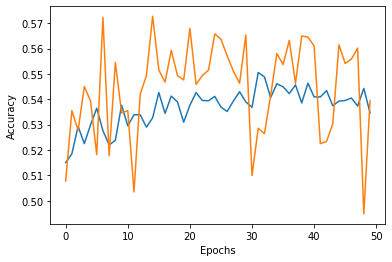

In [184]:
plt.plot(history.history['accuracy'],label='Accuracy')#bleu
plt.plot(history.history['val_accuracy'],label='validation_Accuracy')#orange
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Prédiction

In [201]:
unique = x_prediction.values
results = []
superieur2 =[]
inferieur2 = []
i = 0
predictions_final = model_deux_cinq.predict(np.array([x_train[1]]))
predictions_final.shape

(1, 2)

In [202]:
model_deux_cinq.load_weights("model_buts_2,5.h5")

In [203]:
for i in unique:
    predictions_final = model.predict(np.array([[i[7],i[8],i[9],i[10],i[11],i[12]]])) 
    result = np.argmax(predictions_final)
    results.append(result)
    pred0 =round(predictions_final[0][0],2)
    superieur2.append(pred0)
    pred1 =round(predictions_final[0][1],2)
    inferieur2.append(pred1)

    print(result,predictions_final)

0 [[9.9990976e-01 9.0178597e-05]]
0 [[0.9971329  0.00286705]]
1 [[0.00628496 0.9937151 ]]
0 [[1.0000000e+00 3.1403687e-08]]
0 [[0.99795204 0.002048  ]]
0 [[1.0000000e+00 1.0464887e-08]]
0 [[9.9984860e-01 1.5143101e-04]]
1 [[0.01536193 0.98463804]]
1 [[0.10993606 0.89006394]]
0 [[1.000000e+00 2.378662e-13]]
0 [[9.9999905e-01 9.4939833e-07]]
1 [[0.4515516  0.54844844]]
0 [[1.0000000e+00 1.9409449e-20]]
0 [[0.6809188 0.3190812]]
0 [[1.0000000e+00 3.1769034e-22]]
0 [[9.999989e-01 1.116815e-06]]
0 [[9.9903715e-01 9.6282695e-04]]
0 [[0.5792789  0.42072117]]
1 [[0.14987226 0.8501277 ]]
0 [[9.9968565e-01 3.1437981e-04]]
1 [[0.02406002 0.97594   ]]
0 [[1.0000000e+00 1.2349573e-23]]
1 [[1.4247827e-07 9.9999988e-01]]
0 [[9.9996316e-01 3.6841986e-05]]
0 [[9.9999964e-01 3.7196870e-07]]
0 [[9.9975532e-01 2.4463295e-04]]
0 [[9.999355e-01 6.452806e-05]]
0 [[9.9968183e-01 3.1816179e-04]]
0 [[1.00000e+00 4.16674e-18]]
0 [[9.9998975e-01 1.0256615e-05]]
0 [[1.000000e+00 2.878391e-12]]
0 [[1.000000e+00 3.7

In [204]:
df = {'date':x_prediction.date,'id_match':x_prediction.id_match,'status':x_prediction.status,'id_HomeTeam':x_prediction.idHomeTeam,'id_AwayTeam':x_prediction.idAwayTeam,
      'homeTeam':x_prediction.homeTeam,'AwayTeam':x_prediction.awayTeam,'probabilité < 2,5 buts':inferieur2,'probabilité > 2,5 buts':superieur2}
df = pd.DataFrame(df)
df

,date,id_match,status,id_HomeTeam,id_AwayTeam,homeTeam,AwayTeam,"probabilité < 2,5 buts","probabilité > 2,5 buts"
1429,2020-07-02,279509,FINISHED,100,115,AS Roma,Udinese Calcio,0.00,1.00
1984,2020-07-03,274443,FINISHED,5530,5575,CD Santa Clara,CS Marítimo,0.00,1.00
1090,2020-07-03,273894,FINISHED,78,89,Club Atlético de Madrid,RCD Mallorca,0.99,0.01
1432,2020-07-04,279520,FINISHED,110,98,SS Lazio,AC Milan,0.00,1.00
1431,2020-07-04,279526,FINISHED,471,5890,US Sassuolo Calcio,US Lecce,0.00,1.00
...,...,...,...,...,...,...,...,...,...
2024,2020-07-26,274477,SCHEDULED,1903,498,Sport Lisboa e Benfica,Sporting Clube de Portugal,0.00,1.00
2025,2020-07-26,274478,SCHEDULED,5620,5568,Vitória FC,Os Belenenses Futebol,0.01,0.99
2026,2020-07-26,274479,SCHEDULED,5530,5543,CD Santa Clara,Vitória SC,0.00,1.00
2027,2020-07-26,274480,SCHEDULED,5601,5544,Portimonense SC,CD Aves,0.01,0.99


In [205]:
df.to_csv('C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_buts_matchs\\predictions_buts_matchs_modele_2,5.csv',index = False)
df.to_json (r'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_buts_matchs\\predictions_buts_matchs_modele_2,5.json')

In [206]:
df = {'date':x_prediction.date,'id_match':x_prediction.id_match,'status':x_prediction.status,'id_HomeTeam':x_prediction.idHomeTeam,'id_AwayTeam':x_prediction.idAwayTeam,
      'homeTeam':x_prediction.homeTeam,'AwayTeam':x_prediction.awayTeam,'> 1,5 buts':superieurun,'> 2,5 buts':superieur2}
df = pd.DataFrame(df)
df

,date,id_match,status,id_HomeTeam,id_AwayTeam,homeTeam,AwayTeam,"> 1,5 buts","> 2,5 buts"
1429,2020-07-02,279509,FINISHED,100,115,AS Roma,Udinese Calcio,0.27,1.00
1984,2020-07-03,274443,FINISHED,5530,5575,CD Santa Clara,CS Marítimo,0.30,1.00
1090,2020-07-03,273894,FINISHED,78,89,Club Atlético de Madrid,RCD Mallorca,0.23,0.01
1432,2020-07-04,279520,FINISHED,110,98,SS Lazio,AC Milan,0.26,1.00
1431,2020-07-04,279526,FINISHED,471,5890,US Sassuolo Calcio,US Lecce,0.30,1.00
...,...,...,...,...,...,...,...,...,...
2024,2020-07-26,274477,SCHEDULED,1903,498,Sport Lisboa e Benfica,Sporting Clube de Portugal,0.25,1.00
2025,2020-07-26,274478,SCHEDULED,5620,5568,Vitória FC,Os Belenenses Futebol,0.30,0.99
2026,2020-07-26,274479,SCHEDULED,5530,5543,CD Santa Clara,Vitória SC,0.29,1.00
2027,2020-07-26,274480,SCHEDULED,5601,5544,Portimonense SC,CD Aves,0.31,0.99


In [207]:
# df = {'date':x_prediction.date,'id_match':x_prediction.id_match,'status':x_prediction.status,'id_HomeTeam':x_prediction.idHomeTeam,'id_AwayTeam':x_prediction.idAwayTeam,
#       'homeTeam':x_prediction.homeTeam,'AwayTeam':x_prediction.awayTeam,'< 0,5 buts':zero,'< 1,5 buts':un,'< 2,5 buts':deux}
# df = pd.DataFrame(df)
# df

In [208]:
# df.to_csv('C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_buts_matchs\\predictions_buts_matchs.csv',index = False)
# df.to_json (r'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_buts_matchs\\predictions_buts_matchs.json')

In [209]:
finished = []
scheduled = []

In [210]:
for i in df.values:
    if i[2] == 'FINISHED':
        finished.append(i)
    else:
        scheduled.append(i)

In [211]:
column_names = ["date","id_match", "status","id_HomeTeam","id_AwayTeam","homeTeam","AwayTeam","> 1,5 buts","> 2,5 buts"]
df_fini = pd.DataFrame(finished,columns = column_names)
df_programme = pd.DataFrame(scheduled,columns = column_names)

In [216]:
df_fini

,date,id_match,status,id_HomeTeam,id_AwayTeam,homeTeam,AwayTeam,"> 1,5 buts","> 2,5 buts"
0,2020-07-02,279509,FINISHED,100,115,AS Roma,Udinese Calcio,0.27,1.00
1,2020-07-03,274443,FINISHED,5530,5575,CD Santa Clara,CS Marítimo,0.30,1.00
2,2020-07-03,273894,FINISHED,78,89,Club Atlético de Madrid,RCD Mallorca,0.23,0.01
3,2020-07-04,279520,FINISHED,110,98,SS Lazio,AC Milan,0.26,1.00
4,2020-07-04,279526,FINISHED,471,5890,US Sassuolo Calcio,US Lecce,0.30,1.00
...,...,...,...,...,...,...,...,...,...
83,2020-07-11,273916,FINISHED,79,558,CA Osasuna,RC Celta de Vigo,0.28,1.00
84,2020-07-11,273920,FINISHED,250,81,Real Valladolid CF,FC Barcelona,0.19,1.00
85,2020-07-11,279541,FINISHED,110,471,SS Lazio,US Sassuolo Calcio,0.27,1.00
86,2020-07-11,264686,FINISHED,68,563,Norwich City FC,West Ham United FC,0.30,1.00


In [217]:
df_programme

,date,id_match,status,id_HomeTeam,id_AwayTeam,homeTeam,AwayTeam,"> 1,5 buts","> 2,5 buts"
0,2020-07-12,264682,SCHEDULED,58,354,Aston Villa FC,Crystal Palace FC,0.28,1.00
1,2020-07-12,264684,SCHEDULED,73,57,Tottenham Hotspur FC,Arsenal FC,0.25,1.00
2,2020-07-12,264690,SCHEDULED,1044,338,AFC Bournemouth,Leicester City FC,0.27,1.00
3,2020-07-13,264685,SCHEDULED,66,340,Manchester United FC,Southampton FC,0.26,1.00
4,2020-07-14,264694,SCHEDULED,61,68,Chelsea FC,Norwich City FC,0.23,0.00
...,...,...,...,...,...,...,...,...,...
153,2020-07-26,274477,SCHEDULED,1903,498,Sport Lisboa e Benfica,Sporting Clube de Portugal,0.25,1.00
154,2020-07-26,274478,SCHEDULED,5620,5568,Vitória FC,Os Belenenses Futebol,0.30,0.99
155,2020-07-26,274479,SCHEDULED,5530,5543,CD Santa Clara,Vitória SC,0.29,1.00
156,2020-07-26,274480,SCHEDULED,5601,5544,Portimonense SC,CD Aves,0.31,0.99


In [214]:
# df_fini.to_csv('C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_buts_matchs\\predictions_buts_matchs_finished.csv',index=False)
# df_fini.to_json (r'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_buts_matchs\\predictions_buts_matchs_finished.json')

In [215]:
# df_programme.to_csv('C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_buts_matchs\\predictions_buts_matchs_scheduled.csv',index=False)
# df_programme.to_json (r'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_buts_matchs\\predictions_buts_matchs_scheduled.json')